<a href="https://colab.research.google.com/github/Meghanaaggadi/Aiml1/blob/main/2105A42001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy
import pylab
import networkx
import matplotlib.pyplot

In [179]:
edges = [(0, 1), (1, 5), (5,10), (0,6), (6,2),(2,8), (8,10), (2,3), (3,10), (0,4),(4,1), (1,9),(2,7),(3,7)]

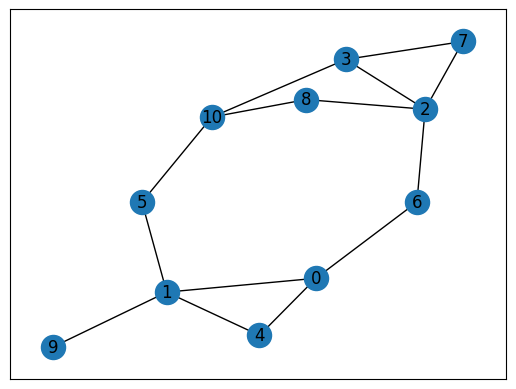

In [180]:
goal = 10
G = networkx.Graph()
G.add_edges_from(edges)
pos = networkx.spring_layout(G)
networkx.draw_networkx_nodes(G, pos)
networkx.draw_networkx_edges(G, pos)
networkx.draw_networkx_labels(G, pos)
pylab.show()

In [181]:
MATRIX_SIZE = 11
M = numpy.matrix(numpy.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

In [182]:
for point in edges:
  print(point)
  if point[1] == goal:
   M[point] = 100
  else:
   M[point] = 0
  if point[0] == goal:
   M[point[::-1]] = 100
  else:
   M[point[::-1]]= 0

(0, 1)
(1, 5)
(5, 10)
(0, 6)
(6, 2)
(2, 8)
(8, 10)
(2, 3)
(3, 10)
(0, 4)
(4, 1)
(1, 9)
(2, 7)
(3, 7)


In [183]:
M[goal, goal]= 100
print(M)
Q = numpy.matrix(numpy.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gamma = 0.75
initial_state = 1

[[ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.   0.   0.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.   0.   0.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1. 100.]
 [  0.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [  0.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.   0.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.   0.  -1.  -1.   0.  -1. 100.]]


In [184]:
def available_actions(state):
   current_state_row = M[state, ]
   available_action = numpy.where(current_state_row >= 0)[1]
   return available_action

available_action = available_actions(initial_state)


In [185]:

def sample_next_action(available_actions_range):
 next_action = int(numpy.random.choice(available_action, 1))
 return next_action

action = sample_next_action(available_action)

In [186]:
def update(current_state, action, gamma):

  max_index = numpy.where(Q[action, ] == numpy.max(Q[action, ]))[1]
  if max_index.shape[0] > 1:
      max_index = int(numpy.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action] + gamma * max_value
  if (numpy.max(Q) > 0):
    return(numpy.sum(Q / numpy.max(Q)*100))
  else:
    return (0)
scores = []

In [187]:
for i in range(1000):
  current_state=np.random.randint(0,int(Q.shape[0]))
  available_action=available_actions(current_state)
  action = sample_next_action(available_action)
  score=update(current_state,action,gamma)
  scores.append(score)


Most efficient path:
[0, 1, 5, 10]


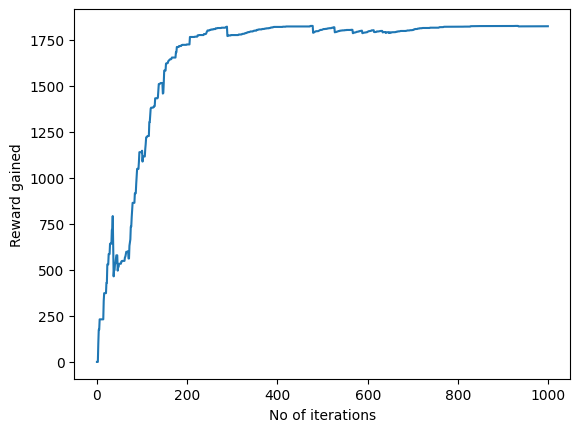

In [188]:
current_state = 0
steps = [current_state]

while current_state != 10:

    next_step_index = numpy.where(Q[current_state, ] == numpy.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(numpy.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

pylab.plot(scores)
pylab.xlabel('No of iterations')
pylab.ylabel('Reward gained')
pylab.show()
